In [2]:
import numpy as np
import pandas as pd

In [11]:
import plotly.graph_objects as go
from collections import Counter

def plot_int_distribution(arr):
    # Count occurrences of each integer
    counts = Counter(arr)
    x_values = list(counts.keys())
    y_values = list(counts.values())

    # Compute percentages
    total_count = sum(y_values)
    percentages = [(count / total_count) * 100 for count in y_values]

    # Create a bar graph using Plotly
    fig = go.Figure(
        data=go.Bar(
            x=x_values, 
            y=y_values, 
            marker=dict(color='blue'),
            text=[f"{p:.1f}%" for p in percentages],  # Add percentage labels
            textposition="auto"  # Position labels above the bars
        ),
        layout=go.Layout(
            title="Distribution of Integer Counts",
            xaxis=dict(title="Integers"),
            yaxis=dict(title="Counts"),
            template="plotly_white"
        )
    )

    fig.show()

In [8]:
def dice_distribution(d, num, loops = 5_000_000):
    dice_range = np.arange(1, d+1)
    dice_rolls = np.sum(np.random.choice(dice_range, size=(loops, num)), axis=1).tolist()
    print(f'Max Roll: {d * num}\nMin Roll: {num}\nExpected Value: {sum((1/d) * dice_range) * num}\nAverage: {np.mean(dice_rolls)}')
    plot_int_distribution(dice_rolls)
    return dice_rolls

In [9]:
def chance_given_threshold(rolls, thresholds):
    for threshold in thresholds:
        count = len(list(filter(lambda num: num >= threshold, rolls)))
        percent = round(count / len(rolls) * 100, 5)
        print(f"Percent of rolls greater than or equal to {threshold}: ~{percent}%")

def chance_of_roll(rolls, numbers):
    for number in numbers:
        count = len(list(filter(lambda num: num == number, rolls)))
        percent = round(count / len(rolls) * 100, 5)
        print(f"Percent of rolls equal to {number}: ~{percent}%")

Max Roll: 18
Min Roll: 3
Expected Value: 10.5
Average: 10.4968246


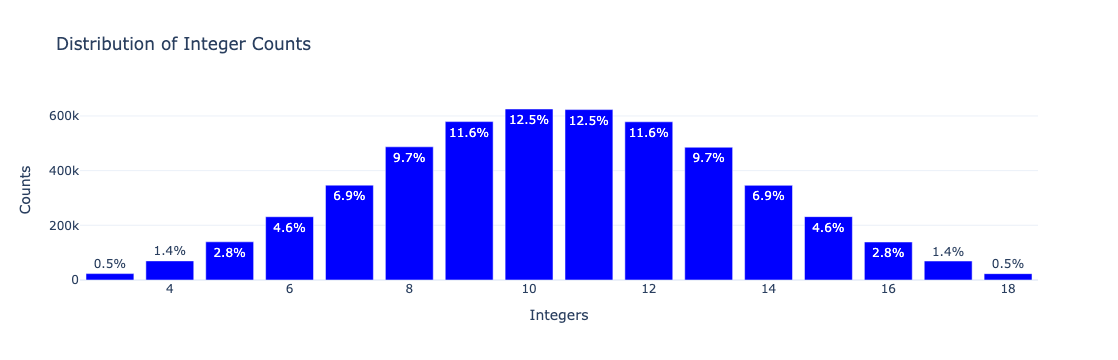

Percent of rolls greater than or equal to 8: ~83.77338%
Percent of rolls greater than or equal to 10: ~62.44492%
Percent of rolls greater than or equal to 12: ~37.47226%
Percent of rolls greater than or equal to 14: ~16.18992%


In [12]:
thresholds = [8, 10, 12, 14]
chance_given_threshold(dice_distribution(6, 3), thresholds)

Max Roll: 16
Min Roll: 2
Expected Value: 9.0
Average: 8.9999344


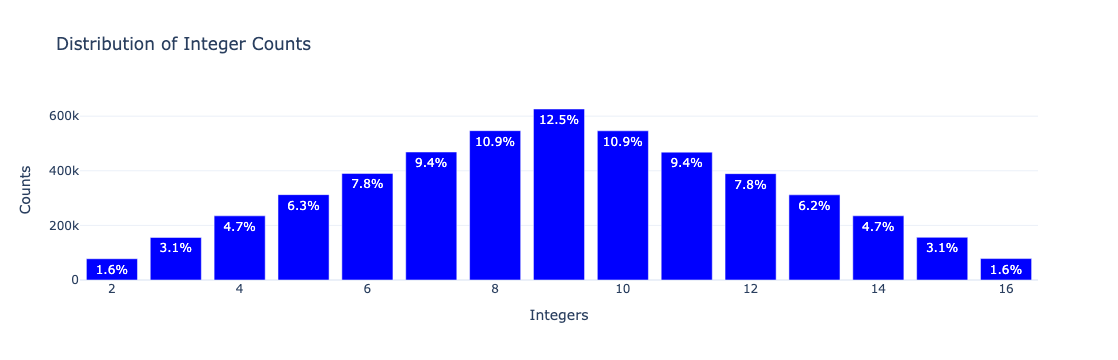

Percent of rolls greater than or equal to 15: ~4.69358%
Percent of rolls greater than or equal to 20: ~0.0%
Percent of rolls greater than or equal to 25: ~0.0%
Percent of rolls greater than or equal to 30: ~0.0%


In [13]:
thresholds = [15, 20, 25, 30]
chance_given_threshold(dice_distribution(8, 2), thresholds)

# Advantage

Max Roll: 20 
Min Roll: 1 
Average Roll: 13.82485456


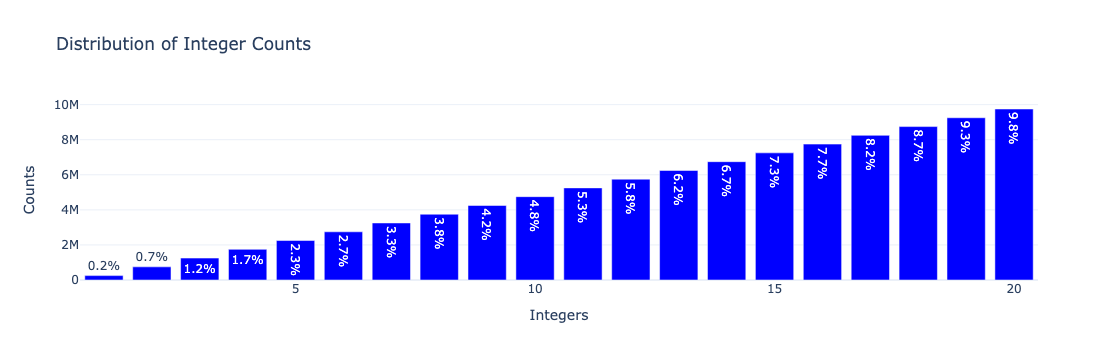

Percent of rolls greater than or equal to 15: ~50.99955%
Percent of rolls greater than or equal to 18: ~27.75087%
Percent of rolls greater than or equal to 20: ~9.75127%


In [14]:
DICE = 20
NUM_OF_DICE = 2
LOOPS = 100000000
THRESHOLD = [15, 18, 20]

dice_range = np.arange(1, DICE+1)

dice_rolls = np.max(
    np.random.choice(dice_range, size=(LOOPS, NUM_OF_DICE)), axis=1
).tolist()

print(f'Max Roll: 20 \nMin Roll: 1 \nAverage Roll: {np.mean(dice_rolls)}')
plot_int_distribution(dice_rolls)
chance_given_threshold(dice_rolls, THRESHOLD)

# Disadvantage

Max Roll: 20 
Min Roll: 1 
Average Roll: 7.17534339


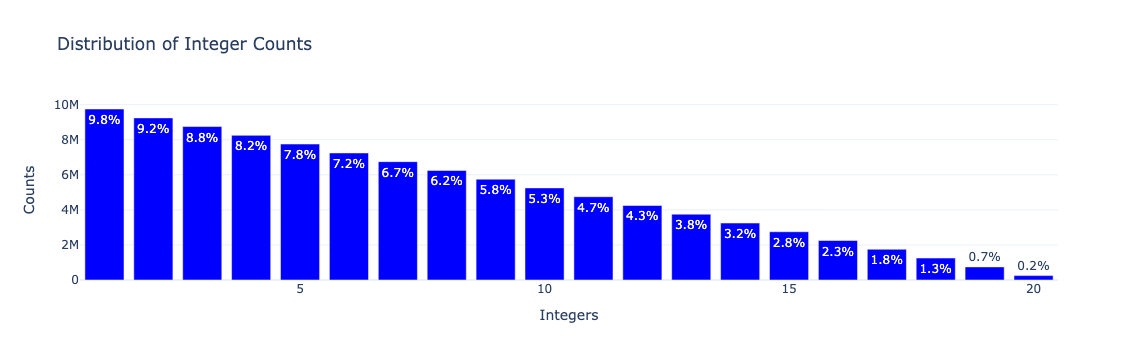

Percent of rolls greater than or equal to 15: ~9.00389%


In [15]:
######## With Disadvantage ##########
DICE = 20
NUM_OF_DICE = 2
LOOPS = 100000000
THRESHOLD = [15]

dice_range = np.arange(1, DICE+1)

dice_rolls = np.min(
    np.random.choice(dice_range, size=(LOOPS, NUM_OF_DICE)), axis=1
).tolist()

print(f'Max Roll: 20 \nMin Roll: 1 \nAverage Roll: {np.mean(dice_rolls)}')
plot_int_distribution(dice_rolls)
chance_given_threshold(dice_rolls, THRESHOLD)

# Rolling Stats
Roll 4d6 and take the largest 3 (remove the smallest value)

For example if you rolled: `3`, `2`, `6`, `4`

You would keep: `3`, `4`, `6`

Remove: `2`

Totaling up to a `13`

In [16]:
def sum_largest_ignoring_minimum(arr):
    results = []
    for subarray in arr:
        sorted_values = sorted(subarray)
        sum_of_largest = sum(sorted_values[1:])
        results.append(int(sum_of_largest))
    return results

Max Roll: 18 
Min Roll: 3 
Average Roll: 12.24483935


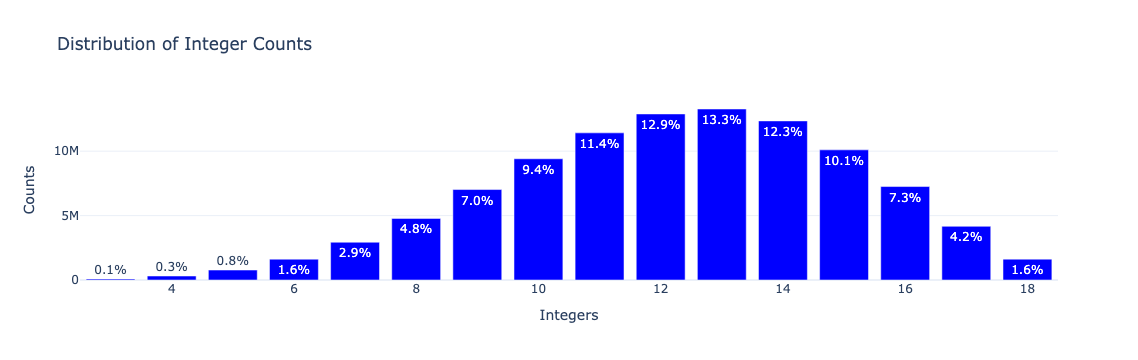

In [17]:
DICE = 6
NUM_OF_DICE = 4
LOOPS = 100000000
THRESHOLDS = [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

dice_range = np.arange(1, DICE+1)
dice_rolls = np.random.choice(dice_range, size=(LOOPS, NUM_OF_DICE))
stats = sum_largest_ignoring_minimum(dice_rolls)

print(f'Max Roll: 18 \nMin Roll: 3 \nAverage Roll: {np.mean(stats)}')
plot_int_distribution(stats)

In [17]:
def roll_stats():
    DICE = 6
    NUM_OF_DICE = 4
    LOOPS = 6
    THRESHOLDS = [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
    
    dice_range = np.arange(1, DICE+1)
    dice_rolls = np.random.choice(dice_range, size=(LOOPS, NUM_OF_DICE))
    
    stats = sum_largest_ignoring_minimum(dice_rolls)
    return stats

In [18]:
%%time

stats_list = []
avg_list = []
for _ in range(1000000):
    stats = roll_stats()
    stats_list.append(stats)
    avg_list.append(np.mean(stats))

plot_int_distribution(avg_list)

CPU times: user 17.8 s, sys: 108 ms, total: 18 s
Wall time: 18.2 s


In [19]:
mean = round(np.mean(avg_list), 3)
std_dev = round(np.std(avg_list), 3)

print(f'Mean: {mean}')
print(f'Std: {std_dev}')

Mean: 12.243
Std: 1.164


In [20]:
stats = roll_stats()
avg = np.mean(stats)
z_score = round((avg - mean) / std_dev, 3)

print(f'Stats: {sorted(stats, reverse=True)}')
print(f'Avg: {round(avg, 2)}')
print(f'Z-Score: {z_score}')

Stats: [17, 13, 12, 11, 10, 6]
Avg: 11.5
Z-Score: -0.638
